In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, Activation, Dropout
import time #helper libraries

In [18]:
input_file="DIS.csv"

In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [20]:
# fix random seed for reproducibility
np.random.seed(5)

In [21]:
# load the dataset
df = read_csv(input_file, header=None, index_col=None, delimiter=',')
df.head()

,0,1,2,3,4,5,6
0,1996-12-31,23.011177,23.175543,22.805719,22.928993,17.804647,2719200
1,1997-01-02,22.928993,22.970085,21.942801,22.148258,17.198397,8115400
2,1997-01-03,22.394806,22.805719,22.394806,22.764629,17.677013,4650000
3,1997-01-06,22.764629,22.928993,22.559172,22.682446,17.613201,3623300
4,1997-01-07,22.682446,22.682446,22.435898,22.641354,17.581289,3606200


In [22]:
# take close price column[5]
all_y = df[5].values
dataset=all_y.reshape(-1, 1)
print(dataset)

[[ 17.804647]
 [ 17.198397]
 [ 17.677013]
 ...
 [102.703629]
 [102.959648]
 [102.624855]]


In [23]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset) 
dataset

[[0.06413303]
 [0.05843065]
 [0.0629325 ]
 ...
 [0.86269207]
 [0.86510018]
 [0.86195112]]


array([[0.06413303],
       [0.05843065],
       [0.0629325 ],
       ...,
       [0.86269207],
       [0.86510018],
       [0.86195112]])

In [24]:
# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [25]:

# reshape into X=t and Y=t+1, timestep 240
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [26]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX


array([[[0.06413303, 0.05843065, 0.0629325 , ..., 0.12475995,
         0.12460893, 0.12340048]],

       [[0.05843065, 0.0629325 , 0.06233229, ..., 0.12460893,
         0.12340048, 0.12098349]],

       [[0.0629325 , 0.06233229, 0.06203212, ..., 0.12340048,
         0.12098349, 0.12294722]],

       ...,

       [[0.09719821, 0.09766753, 0.0951647 , ..., 0.16980584,
         0.1692534 , 0.1662544 ]],

       [[0.09766753, 0.0951647 , 0.09375691, ..., 0.1692534 ,
         0.1662544 , 0.16917449]],

       [[0.0951647 , 0.09375691, 0.10189096, ..., 0.1662544 ,
         0.16917449, 0.1692534 ]]])

In [27]:
testX

array([[[0.16657008, 0.16870098, 0.16649121, ..., 0.15726906,
         0.16153588, 0.16547451]],

       [[0.16870098, 0.16649121, 0.16893772, ..., 0.16153588,
         0.16547451, 0.16752588]],

       [[0.16649121, 0.16893772, 0.16854312, ..., 0.16547451,
         0.16752588, 0.16736181]],

       ...,

       [[0.80103227, 0.75349159, 0.7541302 , ..., 0.87436222,
         0.87306555, 0.87056487]],

       [[0.75349159, 0.7541302 , 0.74108171, ..., 0.87306555,
         0.87056487, 0.87075   ]],

       [[0.7541302 , 0.74108171, 0.75458647, ..., 0.87056487,
         0.87075   , 0.86269207]]])

In [28]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))

model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=240, verbose=1)

C:\Users\safwan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0023
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2436e-04
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9228e-04
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.0427e-04
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4257e-04
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8498e-04
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4671e-04
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2854e-04
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1549e-04
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0155e-04
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9509e-04
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9997e-04 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9654e-04
Epoch 15/100
10/10 

In [29]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [30]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [31]:

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 0.69 RMSE
Test Score: 4.05 RMSE


In [32]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [33]:

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


testPrices:
testPredictions:
[[28.214928]
 [28.342226]
 [28.773834]
 ...
 [96.75348 ]
 [96.82322 ]
 [95.96981 ]]


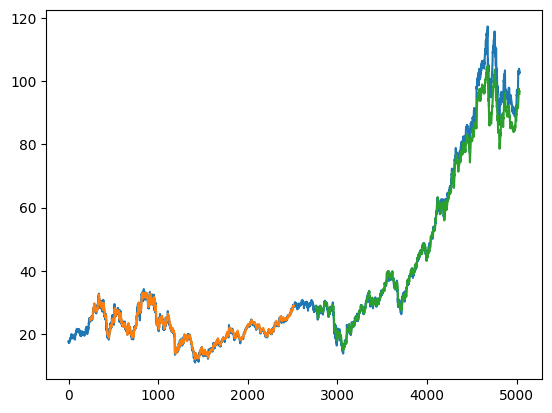

In [36]:

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])

print('testPredictions:')
print(testPredict)
# export prediction and actual prices
df = pd.DataFrame(data={"prediction": np.around(list(testPredict.reshape(-1)), decimals=2), "test_price": np.around(list(testPrices.reshape(-1)), decimals=2)})
df.to_csv("lstm_result.csv", sep=';', index=None)

# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot)
plt.show()

